In [112]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from scipy.stats import chisquare
from statsmodels.stats.proportion import proportions_ztest


if (not os.path.exists('./testSamples.csv')):
  !wget https://raw.githubusercontent.com/BigUnit/datasciencetest/master/testSamples.csv
if (not os.path.exists('./transData.csv')): 
  !wget https://raw.githubusercontent.com/BigUnit/datasciencetest/master/transData.csv


samples = pd.read_csv('testSamples.csv')
data = pd.read_csv('transData.csv')


# 1. What is the aproximate probability distribution between the test group and the control group


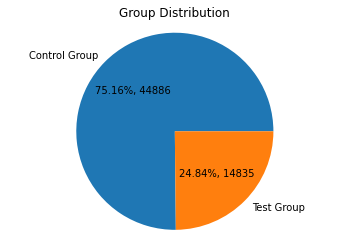

Group Distribution
Control Group: 75.1594916361079%
Test Group: 24.8405083638921%


In [113]:
labels = ['Control Group', 'Test Group']
sizes = samples.groupby('test_group').size()
#print(f"Control Group Count: {control.size}, Test Group Size: {test.size}")
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f}')
ax.axis('equal')
plt.title('Group Distribution')
plt.show()

print(f"Group Distribution\nControl Group: {100*sizes[0]/sum(sizes)}%\nTest Group: {100*sizes[1]/sum(sizes)}%")

# 2. Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL?

In [114]:
df = pd.merge(data,samples,how='left', on='sample_id')


#seperate control and test groups
cData = df.loc[(df['test_group'] == 0)]
tData = df.loc[(df['test_group'] == 1)]

cUserCount = len(cData.groupby('sample_id')) 
tUserCount = len(tData.groupby('sample_id'))
#totUserCount = len(df.groupby('sample_id'))
#print(totUserCount)
#print(cUserCount)
#print(tUserCount)

#totRebills = len(df.loc[(df['transaction_type'] == 'REBILL')].groupby('sample_id'))
#print(totRebills)
cRebills = len(cData.loc[(cData['transaction_type'] == 'REBILL')].groupby('sample_id')) / cUserCount
#print(cRebills)
tRebills = len(tData.loc[(tData['transaction_type'] == 'REBILL')].groupby('sample_id')) / tUserCount
#print(tRebills)


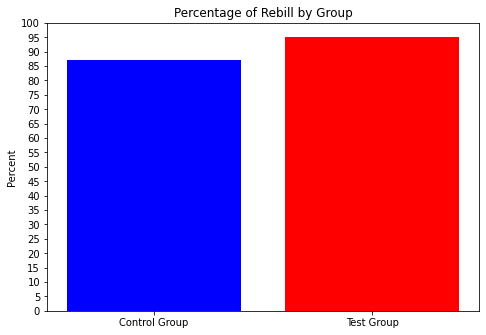

Percentage of Rebill by Group
Control Group: 87.21037998146431%
Test Group: 95.16819571865443%


In [115]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels[0], 100*cRebills, color ='b')
ax.bar(labels[1], 100*tRebills, color ='r')
ax.set_title('Percentage of Rebill by Group')
ax.set_ylabel('Percent')
ax.set_yticks(np.arange(0, 101, 5))
plt.show()

print(f"Percentage of Rebill by Group\nControl Group: {100 * cRebills}%\nTest Group: {100 * tRebills}%")

In [116]:
#rebill counts by group
rebillCounts = [len(cData.loc[(cData['transaction_type'] == 'REBILL')].groupby('sample_id')), len(tData.loc[(tData['transaction_type'] == 'REBILL')].groupby('sample_id'))]
z_stat, pval = proportions_ztest(rebillCounts, nobs=[cUserCount,tUserCount])
pval

7.405360690361388e-14

# 3. Is a user that must call-in to cancel more likely to generate more revenues?

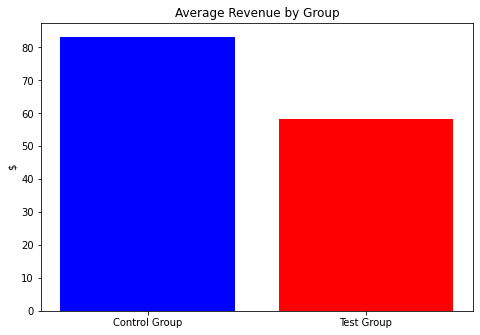

Average Revenue by Group
Control Group: $83.26
Test Group: $58.37


In [117]:
#average revenue 
cAvgRev = round(cData['transaction_amount'].sum() / cUserCount, 2)
tAvgRev = round(tData['transaction_amount'].sum() / tUserCount, 2)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels[0], cAvgRev, color ='b')
ax.bar(labels[1], tAvgRev, color ='r')
ax.set_title('Average Revenue by Group')
ax.set_ylabel('$')
plt.show()

print(f"Average Revenue by Group\nControl Group: ${cAvgRev}\nTest Group: ${tAvgRev}")

# 4. Is a user that must call-in more likely to produce a higher chargeback rate(CHARGEBACKs/REBILLs)?

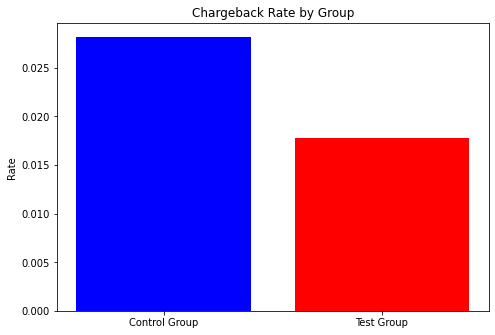

Chargeback Rate by Group
Control Group: 0.028221512247071354
Test Group: 0.017784711388455537


In [118]:
#get ratio of chargebacks to rebills
cCharge = len(cData.loc[(cData['transaction_type'] == 'CHARGEBACK')]) / len(cData.loc[(cData['transaction_type'] == 'REBILL')])
tCharge = len(tData.loc[(tData['transaction_type'] == 'CHARGEBACK')]) / len(tData.loc[(tData['transaction_type'] == 'REBILL')])


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels[0], cCharge, color ='b')
ax.bar(labels[1], tCharge, color ='r')
ax.set_title('Chargeback Rate by Group')
ax.set_ylabel('Rate')
plt.show()

print(f"Chargeback Rate by Group\nControl Group: {cCharge}\nTest Group: {tCharge}")